In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
df = pd.read_csv("data_rev_comma_separated.csv")

# 1. Data Understanding

In [5]:
df.sample(15)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,zip_code,addr_state,total_pymnt,total_rec_int,default_ind
119122,5782723,7214508,20000,60 months,17.77,3 years,RENT,46000.0,debt_consolidation,265xx,WV,15160.05,7330.40,0
435006,11437089,11316954,31575,60 months,20.50,3 years,MORTGAGE,66000.0,home_improvement,293xx,SC,33177.45,1602.45,0
470924,66573270,71299071,15000,36 months,9.17,4 years,MORTGAGE,120000.0,credit_card,850xx,AZ,470.55,106.98,0
414230,12886361,14908484,9425,36 months,21.18,10+ years,RENT,35884.0,debt_consolidation,441xx,OH,7831.12,2787.56,0
293276,28382585,30905705,7500,36 months,13.35,8 years,RENT,48000.0,debt_consolidation,922xx,CA,3575.91,1008.39,0
165179,3153598,3866297,24000,60 months,13.11,10+ years,MORTGAGE,78000.0,credit_card,972xx,OR,2.928.264.357,5282.64,0
176708,2284841,2707011,10575,36 months,12.12,< 1 year,RENT,35000.0,credit_card,951xx,CA,10372.24,2015.51,1
592647,59511659,63445401,28000,60 months,21.99,4 years,OWN,81000.0,debt_consolidation,773xx,TX,3280.85,2211.59,0
131410,5185850,1383762,10000,36 months,7.90,9 years,MORTGAGE,59800.0,debt_consolidation,287xx,NC,9697.01,1233.42,0
552218,61762261,65931977,6000,36 months,7.89,2 years,MORTGAGE,35700.0,home_improvement,212xx,MD,556.58,108.84,0


In [6]:
df.shape

(855969, 14)

In [7]:
df.info()
jumlah_nilai_unik = df.nunique()
print(jumlah_nilai_unik)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              855969 non-null  int64  
 1   member_id       855969 non-null  int64  
 2   loan_amnt       855969 non-null  int64  
 3   term            855969 non-null  object 
 4   int_rate        855969 non-null  float64
 5   emp_length      812908 non-null  object 
 6   home_ownership  855969 non-null  object 
 7   annual_inc      855969 non-null  float64
 8   purpose         855969 non-null  object 
 9   zip_code        855969 non-null  object 
 10  addr_state      855969 non-null  object 
 11  total_pymnt     855969 non-null  object 
 12  total_rec_int   855969 non-null  float64
 13  default_ind     855969 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 91.4+ MB
id                855969
member_id         855969
loan_amnt           1368
term           

# 2. Data Preparation

In [9]:
# Convert total_pymnt string to total_payment float
df['total_payment'] = df['total_pymnt'].str.replace('.','', regex=False).astype(float)

# Convert term string to term_nums float
df['term_nums'] = df['term'].str.replace(' months','', regex=False).astype(float)

# Convert emp_length from object to float
def convert_emp_length(value):
    if pd.isna(value):
        return np.nan
    if '<' in value:
        return 0
    if '10+' in value:
        return 10
    else:
        return int(value.split()[0])
    
df['emp_length_nums'] = df['emp_length'].apply(convert_emp_length)

In [10]:
df.shape

(855969, 17)

In [11]:
cats = ['home_ownership','purpose','default_ind']
nums = ['loan_amnt','term_nums','int_rate','emp_length_nums','annual_inc','total_payment','total_rec_int']
geo = ['zip_code','addr_state']

In [12]:
df.isna().sum()

id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
emp_length         43061
home_ownership         0
annual_inc             0
purpose                0
zip_code               0
addr_state             0
total_pymnt            0
total_rec_int          0
default_ind            0
total_payment          0
term_nums              0
emp_length_nums    43061
dtype: int64

In [13]:
print((43061/df.shape[0])*100)

5.030672839787422


Ada sejumlah 43061 value null dalam emp_length_nums. Missing value sejumlah 5 persen dari keseluruhan data, karena total data juga lebih dari 5000 rows maka row dengan nilai null dapat dihapus.

### Duplicate Values

In [16]:
# Duplicate values
duplicates = df.loc[df.duplicated()]

if not duplicates.empty:
    print(duplicates)
else:
    print("There is no duplicate values in this dataset")

There is no duplicate values in this dataset


# 3. Feature Understanding

## Univariate Analysis


In [18]:
df[nums].describe()

,loan_amnt,term_nums,int_rate,emp_length_nums,annual_inc,total_payment,total_rec_int
count,855969.000000,855969.000000,855969.000000,812908.000000,8.559690e+05,8.559690e+05,855969.000000
mean,14745.571335,43.170764,13.192320,6.019334,7.507119e+04,3.040335e+08,1755.046221
std,8425.340005,10.985382,4.368365,3.663588,6.426447e+04,1.217892e+09,2081.692980
min,500.000000,36.000000,5.320000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,36.000000,9.990000,3.000000,4.500000e+04,1.262240e+05,451.270000
50%,13000.000000,36.000000,12.990000,6.000000,6.500000e+04,4.042350e+05,1076.910000
75%,20000.000000,60.000000,15.990000,10.000000,9.000000e+04,1.111748e+06,2233.980000
max,35000.000000,60.000000,28.990000,10.000000,9.500000e+06,9.999728e+09,24205.620000


## Numericals

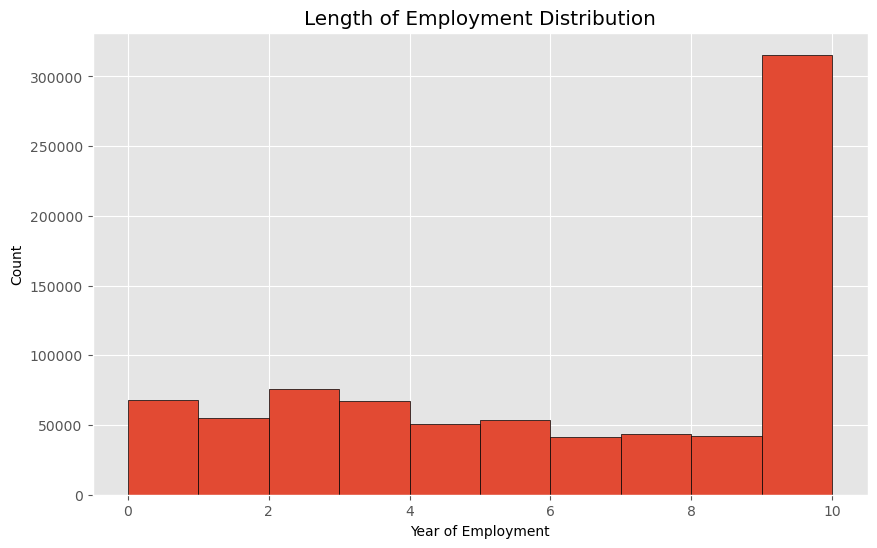

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['emp_length_nums'], bins=10, edgecolor='black')
plt.title('Length of Employment Distribution')
plt.xlabel('Year of Employment')
plt.ylabel('Count')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\anaconda\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orienta

<function matplotlib.pyplot.show(close=None, block=None)>

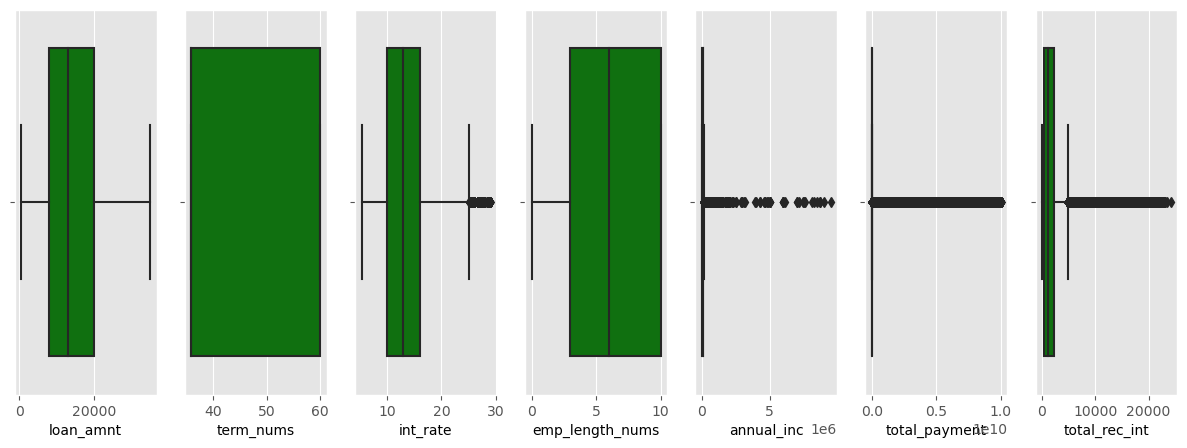

In [21]:
# Numericals Boxplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(x=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
plt.tight_layout
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

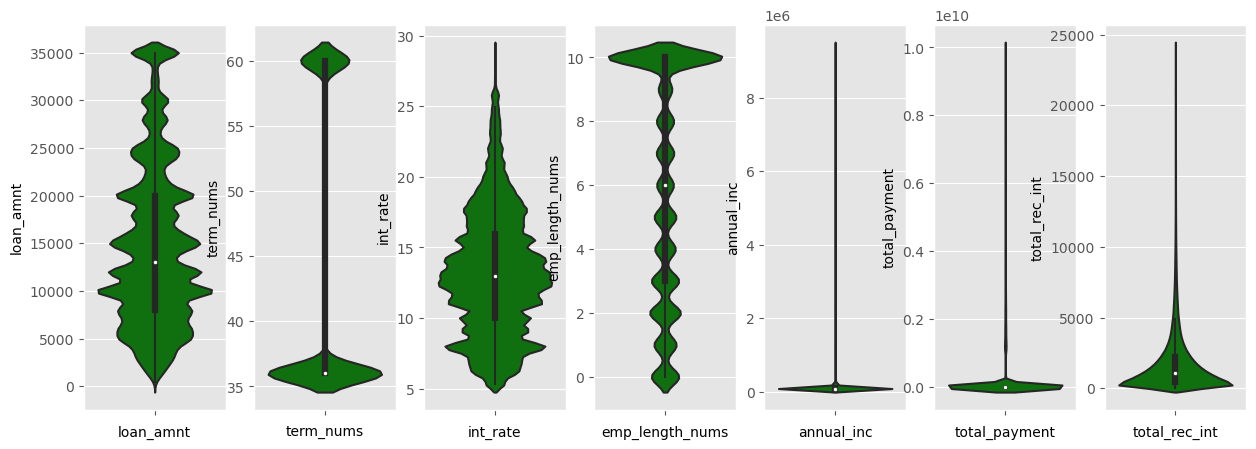

In [22]:
# Numericals Violinplot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.xlabel(nums[i])
    
plt.tight_layout
plt.show

C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[nums[i]], color='blue', shade=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\515954374.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in 

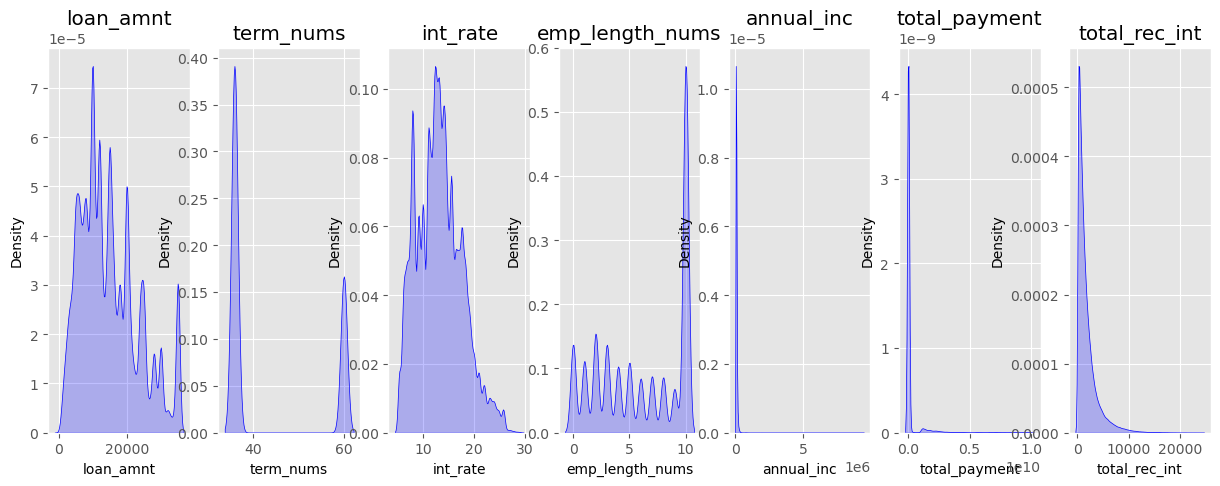

In [23]:
# Numericals KDE Plot
plt.figure(figsize=(15,5))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.kdeplot(df[nums[i]], color='blue', shade=True)
    plt.title(nums[i])
    
    plt.tight_layout
    plt.show

## Geo

<function matplotlib.pyplot.show(close=None, block=None)>

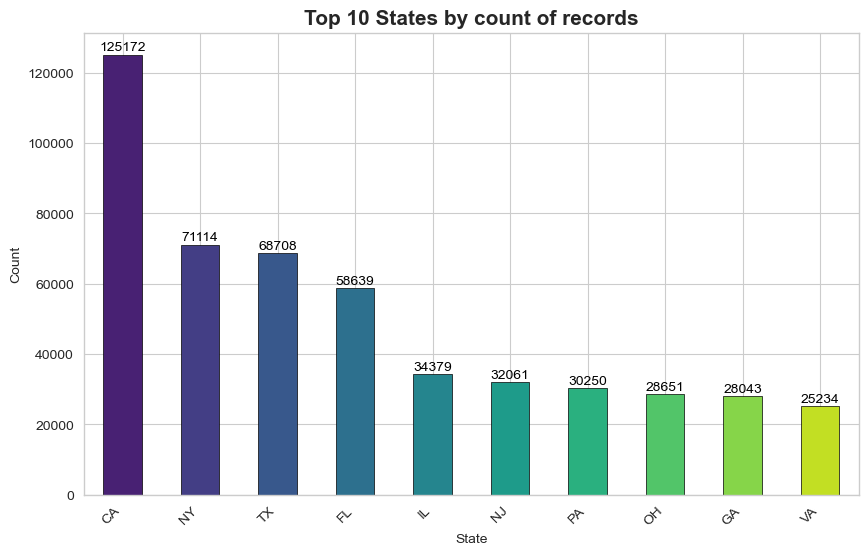

In [25]:
# Barplot for State

sns.set_style('whitegrid')
palette = sns.color_palette('viridis', 10)

plt.figure(figsize=(10,6))
ax = df['addr_state'].value_counts().head(10) \
    .plot(kind= 'bar', color= palette, edgecolor='black')

ax.set_title('Top 10 States by count of records', fontsize= 15, fontweight='bold')
ax.set_xlabel('State', fontsize=10)
ax.set_ylabel('Count', fontsize= 10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 5), textcoords='offset points', 
        fontsize=10, color='black'
    )
    
plt.tight_layout
plt.show

In [26]:
df['zip_code'].value_counts().head(10)

945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
100xx    7348
070xx    7143
331xx    7139
900xx    7022
770xx    6657
Name: zip_code, dtype: int64

## Categoricals

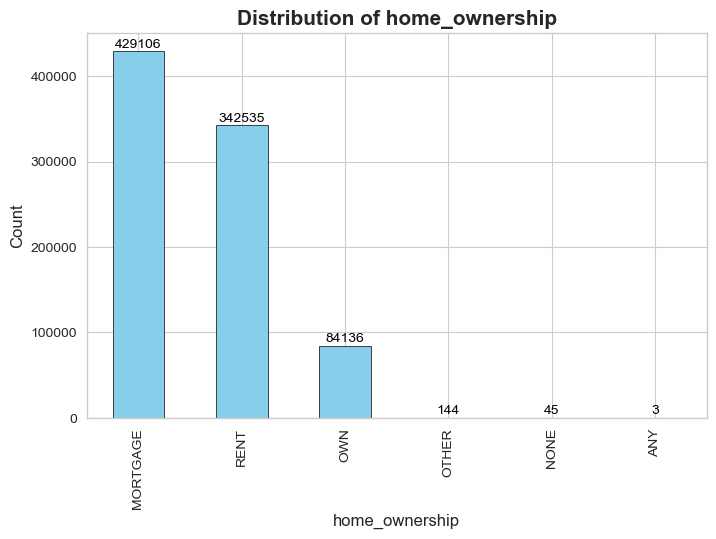

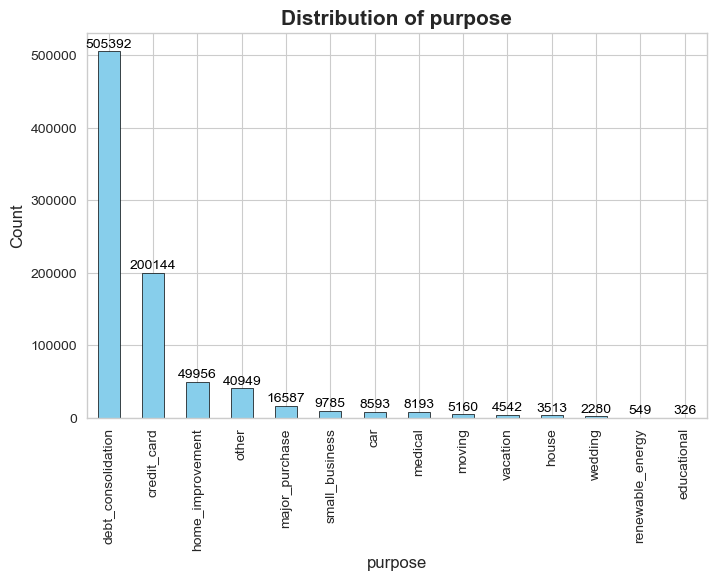

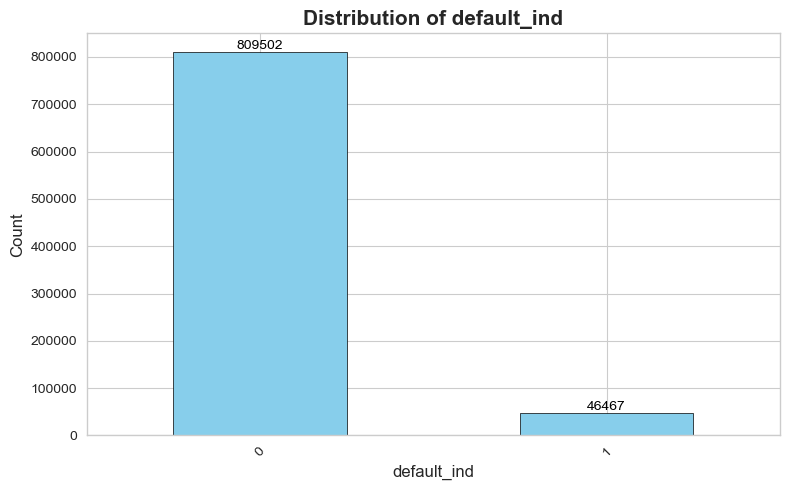

In [28]:
# Categorical values distribution

sns.set_style('whitegrid')

for cat in cats:
    plt.figure(figsize=(8,5))
    ax = df[cat].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    ax.set_title(f'Distribution of {cat}', fontsize=15, fontweight='bold')
    ax.set_xlabel(cat, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Display values on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), textcoords='offset points', 
                    fontsize=10, color='black')
        
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

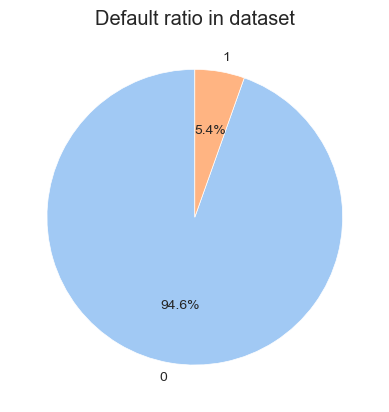

In [29]:
# Default Percentage represented in pie chart

df['default_ind'].value_counts().plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('Default ratio in dataset')
plt.ylabel('')
plt.show()

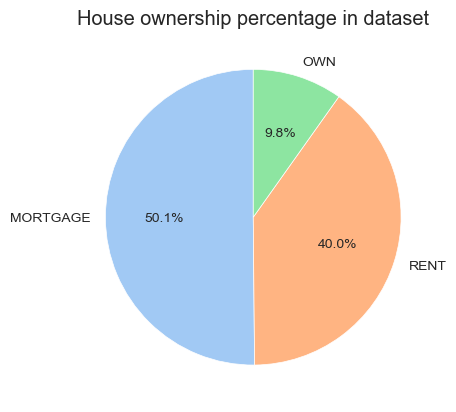

In [30]:
# House ownership status Percentage represented in pie chart

df['home_ownership'].value_counts().head(3).plot(kind='pie', autopct= '%1.1f%%', startangle=90, colors= sns.color_palette('pastel'))
plt.title('House ownership percentage in dataset')
plt.ylabel('')
plt.show()

# 4. Feature Relationships

### Pairplot

In [33]:
#sns.pairplot(df, vars=nums)
#plt.show()

### Correlation Heatmap

C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\1727787355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.dropna().corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


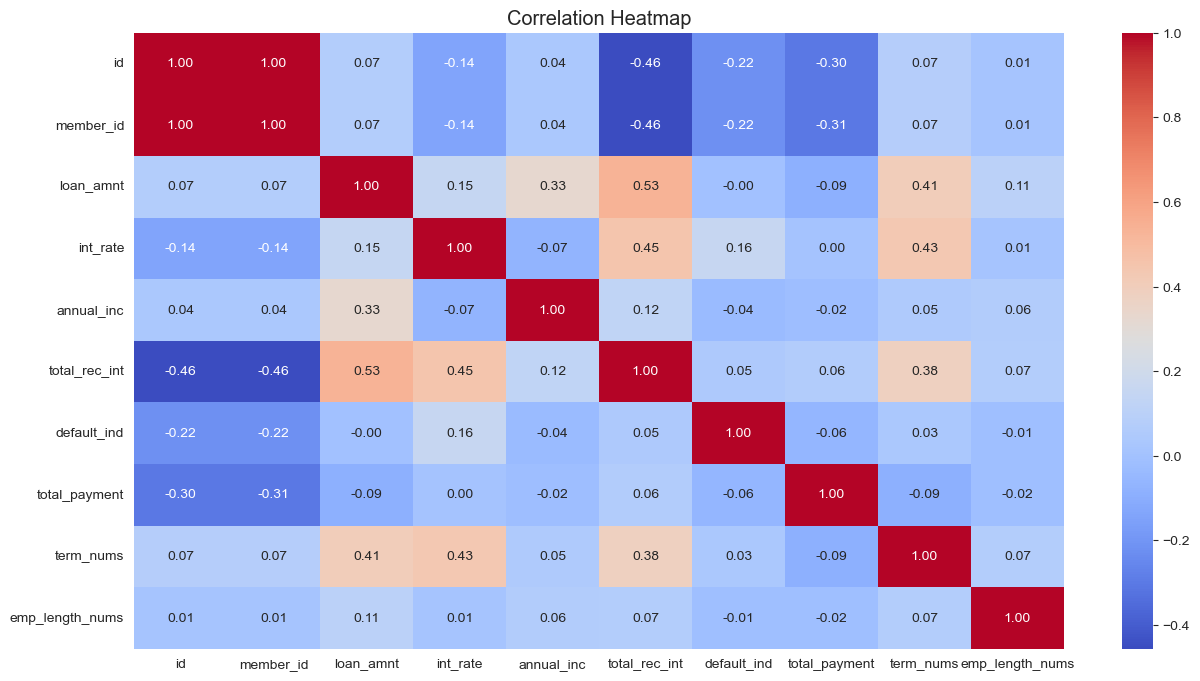

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.dropna().corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# 5. Data Cleansing

a. Outliers

Karena Objective dari projek ini adalah untuk memprediksi maka outliers akan kita remove dari dataset. Outlier ditentukan menggunakan Interquartile range dan diplot selanjutnya menggunakan Histogram KDE plot

In [37]:
df_cleaned = df.copy()

In [38]:
total_outliers_removed = 0

# Outlier del function
for col in nums:
    for i in range(2): 
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Hitung jumlah data sebelum penyaringan
        before_removal = df_cleaned.shape[0]
        # Saring data
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        # Hitung jumlah data setelah penyaringan dan outlier yang dihapus
        after_removal = df_cleaned.shape[0]
        total_outliers_removed += (before_removal - after_removal)

print(f"Bentuk data setelah menghapus outlier: {df_cleaned.shape}")
print(f"Total outlier yang dihapus: {total_outliers_removed}")

Bentuk data setelah menghapus outlier: (571240, 17)
Total outlier yang dihapus: 284729


Jumlah data yang diolah untuk 'loan_amnt': 571240
Jumlah data yang diolah untuk 'term_nums': 571240
Jumlah data yang diolah untuk 'int_rate': 571240
Jumlah data yang diolah untuk 'emp_length_nums': 571240
Jumlah data yang diolah untuk 'annual_inc': 571240
Jumlah data yang diolah untuk 'total_payment': 571240
Jumlah data yang diolah untuk 'total_rec_int': 571240


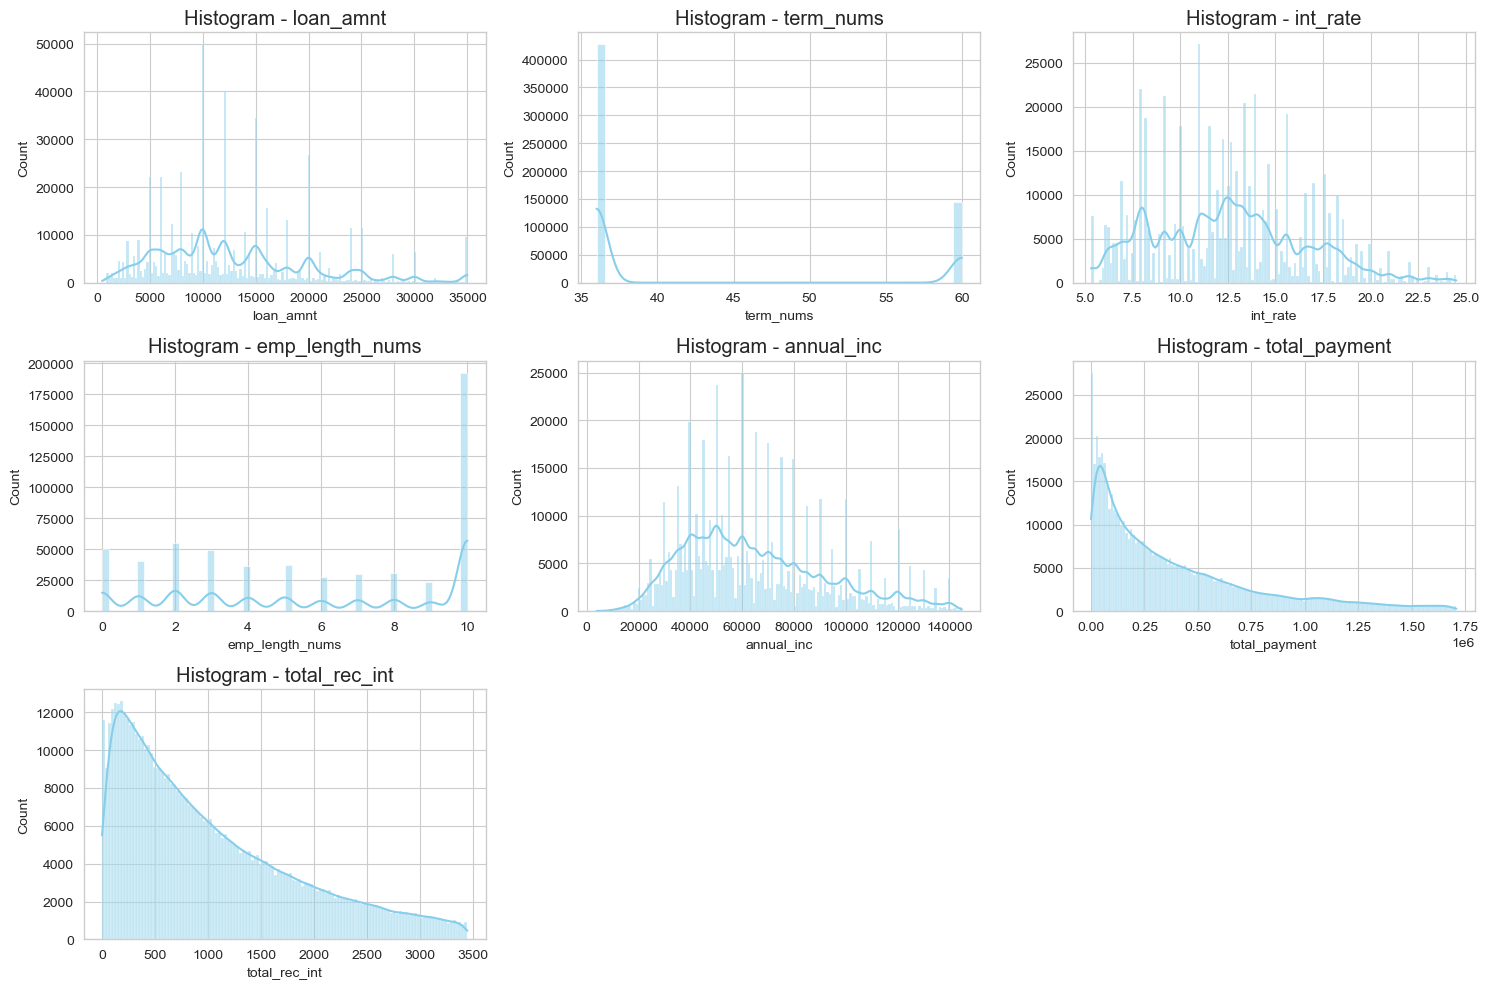

           loan_amnt      term_nums       int_rate  emp_length_nums  \
count  571240.000000  571240.000000  571240.000000    571240.000000   
mean    12790.459001      42.043484      12.556721         5.915536   
std      7256.098493      10.417299       3.958799         3.683954   
min       500.000000      36.000000       5.320000         0.000000   
25%      7500.000000      36.000000       9.170000         2.000000   
50%     11500.000000      36.000000      12.490000         6.000000   
75%     16175.000000      60.000000      14.990000        10.000000   
max     35000.000000      60.000000      24.500000        10.000000   

          annual_inc  total_payment  total_rec_int  
count  571240.000000   5.712400e+05  571240.000000  
mean    64792.640491   3.884844e+05    1022.914395  
std     27472.375533   3.847330e+05     834.133730  
min      3800.000000   0.000000e+00       0.000000  
25%     44000.000000   8.971400e+04     346.340000  
50%     60000.000000   2.598880e+05     79

In [39]:
for col in nums:
    print(f"Jumlah data yang diolah untuk '{col}': {len(df_cleaned[col].dropna())}")

# Histl=plot
plt.figure(figsize=(15, 10))  
for i, col in enumerate(nums, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)


if len(nums) < 9:  
    for j in range(len(nums) + 1, 10):  
        plt.subplot(3, 3, j).axis('off')  
plt.tight_layout()
plt.show()

# New Stats
print(df_cleaned[nums].describe())


b. Missing Values

In [41]:
df_cleaned = df_cleaned.dropna()

print("Shape before:", df.shape)
print("Shape after:", df_cleaned.shape)

Shape before: (855969, 17)
Shape after: (571240, 17)


In [42]:
print(df_cleaned.head())
jumlah_nilai_unik = df_cleaned.nunique()
print(jumlah_nilai_unik)

        id  member_id  loan_amnt       term  int_rate emp_length  \
1  1077430    1314167       2500  60 months     15.27   < 1 year   
4  1075358    1311748       3000  60 months     12.69     1 year   
6  1069639    1304742       7000  60 months     15.96    8 years   
8  1071795    1306957       5600  60 months     21.28    4 years   
9  1071570    1306721       5375  60 months     12.69   < 1 year   

  home_ownership  annual_inc             purpose zip_code addr_state  \
1           RENT     30000.0                 car    309xx         GA   
4           RENT     80000.0               other    972xx         OR   
6           RENT     47004.0  debt_consolidation    280xx         NC   
8            OWN     40000.0      small_business    958xx         CA   
9           RENT     15000.0               other    774xx         TX   

  total_pymnt  total_rec_int  default_ind  total_payment  term_nums  \
1     1008.71         435.17            1       100871.0       60.0   
4     3242.17   

# 6. Feature Engineering

In [44]:
print(df_cleaned['purpose'].unique())

['car' 'other' 'debt_consolidation' 'small_business' 'major_purchase'
 'credit_card' 'moving' 'medical' 'home_improvement' 'vacation' 'house'
 'wedding' 'renewable_energy' 'educational']


In [45]:
## new feature montly debt
df_cleaned['monthlydebtperincome'] = (df_cleaned['loan_amnt'] / df_cleaned['term_nums']) / (df_cleaned['annual_inc'] / 12)
print(df_cleaned.head())

        id  member_id  loan_amnt       term  int_rate emp_length  \
1  1077430    1314167       2500  60 months     15.27   < 1 year   
4  1075358    1311748       3000  60 months     12.69     1 year   
6  1069639    1304742       7000  60 months     15.96    8 years   
8  1071795    1306957       5600  60 months     21.28    4 years   
9  1071570    1306721       5375  60 months     12.69   < 1 year   

  home_ownership  annual_inc             purpose zip_code addr_state  \
1           RENT     30000.0                 car    309xx         GA   
4           RENT     80000.0               other    972xx         OR   
6           RENT     47004.0  debt_consolidation    280xx         NC   
8            OWN     40000.0      small_business    958xx         CA   
9           RENT     15000.0               other    774xx         TX   

  total_pymnt  total_rec_int  default_ind  total_payment  term_nums  \
1     1008.71         435.17            1       100871.0       60.0   
4     3242.17   

In [46]:
# Menambahkan kolom baru 'payment_progress'
df_cleaned['payment_progress'] = (df_cleaned['total_payment'] - df_cleaned['total_rec_int']) / df_cleaned['loan_amnt']

print(df_cleaned.head())

        id  member_id  loan_amnt       term  int_rate emp_length  \
1  1077430    1314167       2500  60 months     15.27   < 1 year   
4  1075358    1311748       3000  60 months     12.69     1 year   
6  1069639    1304742       7000  60 months     15.96    8 years   
8  1071795    1306957       5600  60 months     21.28    4 years   
9  1071570    1306721       5375  60 months     12.69   < 1 year   

  home_ownership  annual_inc             purpose zip_code addr_state  \
1           RENT     30000.0                 car    309xx         GA   
4           RENT     80000.0               other    972xx         OR   
6           RENT     47004.0  debt_consolidation    280xx         NC   
8            OWN     40000.0      small_business    958xx         CA   
9           RENT     15000.0               other    774xx         TX   

  total_pymnt  total_rec_int  default_ind  total_payment  term_nums  \
1     1008.71         435.17            1       100871.0       60.0   
4     3242.17   

In [47]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# 1. Standarisasi Kolom 'loan_amnt' dan 'total_rec_int'
df_cleaned[['loan_amnt', 'total_rec_int']] = scaler.fit_transform(df_cleaned[['loan_amnt', 'total_rec_int']])

In [48]:
# 1. Menambahkan kolom 'monthly_income' dari 'annual_inc'
df_cleaned['monthly_income'] = df_cleaned['annual_inc'] / 12

# Melakukan one-hot encoding untuk kolom 'home_ownership'
df_cleaned = pd.get_dummies(df_cleaned, columns=['home_ownership'], 
                             prefix='home_ownership', 
                             dtype=int)
print(df_cleaned.head())

        id  member_id  loan_amnt       term  int_rate emp_length  annual_inc  \
1  1077430    1314167  -1.418182  60 months     15.27   < 1 year     30000.0   
4  1075358    1311748  -1.349274  60 months     12.69     1 year     80000.0   
6  1069639    1304742  -0.798013  60 months     15.96    8 years     47004.0   
8  1071795    1306957  -0.990955  60 months     21.28    4 years     40000.0   
9  1071570    1306721  -1.021963  60 months     12.69   < 1 year     15000.0   

              purpose zip_code addr_state  ... emp_length_nums  \
1                 car    309xx         GA  ...             0.0   
4               other    972xx         OR  ...             1.0   
6  debt_consolidation    280xx         NC  ...             8.0   
8      small_business    958xx         CA  ...             4.0   
9               other    774xx         TX  ...             0.0   

   monthlydebtperincome  payment_progress  monthly_income  home_ownership_ANY  \
1              0.016667         40.174332

In [49]:
# Melakukan one-hot encoding untuk kolom 'term'
df_cleaned = pd.get_dummies(df_cleaned, columns=['term'], 
                             prefix='term', 
                             dtype=int)

print(df_cleaned.head())

        id  member_id  loan_amnt  int_rate emp_length  annual_inc  \
1  1077430    1314167  -1.418182     15.27   < 1 year     30000.0   
4  1075358    1311748  -1.349274     12.69     1 year     80000.0   
6  1069639    1304742  -0.798013     15.96    8 years     47004.0   
8  1071795    1306957  -0.990955     21.28    4 years     40000.0   
9  1071570    1306721  -1.021963     12.69   < 1 year     15000.0   

              purpose zip_code addr_state total_pymnt  ...  payment_progress  \
1                 car    309xx         GA     1008.71  ...         40.174332   
4               other    972xx         OR     3242.17  ...        107.735977   
6  debt_consolidation    280xx         NC     8136.84  ...        115.808287   
8      small_business    958xx         CA      646.02  ...         11.483404   
9               other    774xx         TX     1476.19  ...         27.364759   

   monthly_income  home_ownership_ANY  home_ownership_MORTGAGE  \
1     2500.000000                   0 

In [50]:
# Membuat mapping untuk ordinal encoding dengan durasi yang lebih spesifik
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 1,
    '3 years': 1,
    '4 years': 1,
    '5 years': 1,
    '6 years': 2,
    '7 years': 2,
    '8 years': 2,
    '9 years': 2,
    '10+ years': 2
}

# Melakukan encoding pada kolom 'emp_length'
df_cleaned['emp_length_encoded'] = df_cleaned['emp_length'].map(emp_length_mapping)

print(df_cleaned.head())

        id  member_id  loan_amnt  int_rate emp_length  annual_inc  \
1  1077430    1314167  -1.418182     15.27   < 1 year     30000.0   
4  1075358    1311748  -1.349274     12.69     1 year     80000.0   
6  1069639    1304742  -0.798013     15.96    8 years     47004.0   
8  1071795    1306957  -0.990955     21.28    4 years     40000.0   
9  1071570    1306721  -1.021963     12.69   < 1 year     15000.0   

              purpose zip_code addr_state total_pymnt  ...  monthly_income  \
1                 car    309xx         GA     1008.71  ...     2500.000000   
4               other    972xx         OR     3242.17  ...     6666.666667   
6  debt_consolidation    280xx         NC     8136.84  ...     3917.000000   
8      small_business    958xx         CA      646.02  ...     3333.333333   
9               other    774xx         TX     1476.19  ...     1250.000000   

   home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  \
1                   0                        

In [51]:
# Melakukan one-hot encoding untuk kolom 'purpose'
df_cleaned = pd.get_dummies(df_cleaned, columns=['purpose'], 
                             prefix='purpose', 
                             dtype=int)

print(df_cleaned.head())

        id  member_id  loan_amnt  int_rate emp_length  annual_inc zip_code  \
1  1077430    1314167  -1.418182     15.27   < 1 year     30000.0    309xx   
4  1075358    1311748  -1.349274     12.69     1 year     80000.0    972xx   
6  1069639    1304742  -0.798013     15.96    8 years     47004.0    280xx   
8  1071795    1306957  -0.990955     21.28    4 years     40000.0    958xx   
9  1071570    1306721  -1.021963     12.69   < 1 year     15000.0    774xx   

  addr_state total_pymnt  total_rec_int  ...  purpose_home_improvement  \
1         GA     1008.71      -0.704617  ...                         0   
4         OR     3242.17      -0.016597  ...                         0   
6         NC     8136.84       2.401386  ...                         0   
8         CA      646.02      -0.872732  ...                         0   
9         TX     1476.19      -0.586830  ...                         0   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
1        

In [52]:
# Misalkan dataset awal adalah df_cleaned dan kolom target adalah 'default_ind'
X = df_cleaned.drop(columns=['default_ind'])  # Semua fitur (X)
y = df_cleaned['default_ind']                # Target (y)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12948\2786912840.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_with_target.corr()


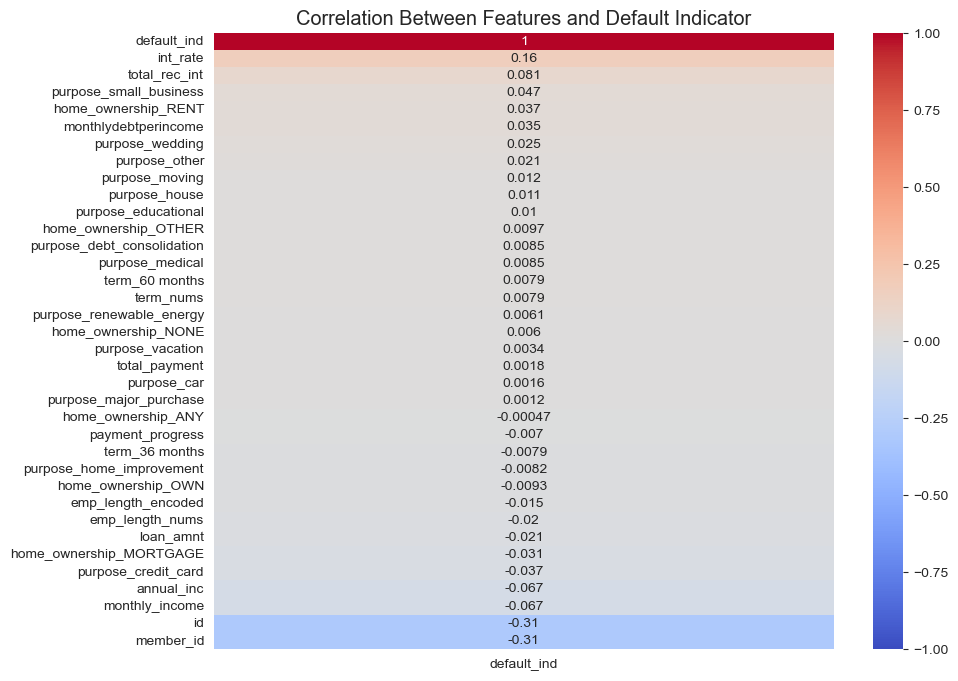

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menambahkan target ke dalam dataset untuk korelasi
df_with_target = df_cleaned.copy()
df_with_target['default_ind'] = y  # Pastikan target sudah ada di dataframe

# Menghitung matriks korelasi
correlation_matrix = df_with_target.corr()

# Menampilkan korelasi fitur terhadap target
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['default_ind']].sort_values(by='default_ind', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Features and Default Indicator')
plt.show()


In [54]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Menentukan fitur (X) dan target (y)
X = df_cleaned[['loan_amnt', 'term_36 months', 'term_60 months', 'monthlydebtperincome', 'payment_progress', 
                'emp_length_encoded', 'int_rate', 'purpose_car', 'purpose_other', 'purpose_debt_consolidation', 
                'purpose_small_business', 'purpose_major_purchase', 'purpose_credit_card', 'purpose_moving', 
                'purpose_medical', 'purpose_home_improvement', 'purpose_vacation', 'purpose_house', 'purpose_wedding', 
                'purpose_renewable_energy', 'purpose_educational', 'home_ownership_OWN', 'home_ownership_RENT', 
                'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_ANY', 
                'annual_inc', 'total_payment', 'total_rec_int']]

y = df_cleaned['default_ind']

# Split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur numerik untuk Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat dan melatih model Logistic Regression
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(X_train_scaled, y_train)

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model Logistic Regression
print("Logistic Regression Evaluation:")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# AUC Score untuk Logistic Regression
y_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
auc_score_logreg = roc_auc_score(y_test, y_prob_logreg)
print(f"AUC Score: {auc_score_logreg}")

# Evaluasi model Random Forest
print("\nRandom Forest Evaluation:")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# AUC Score untuk Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
print(f"AUC Score: {auc_score_rf}")


Logistic Regression Evaluation:
Confusion Matrix:
[[107544     24]
 [  6674      6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    107568
           1       0.20      0.00      0.00      6680

    accuracy                           0.94    114248
   macro avg       0.57      0.50      0.49    114248
weighted avg       0.90      0.94      0.91    114248

AUC Score: 0.7284552144595237

Random Forest Evaluation:
Confusion Matrix:
[[107444    124]
 [  5586   1094]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    107568
           1       0.90      0.16      0.28      6680

    accuracy                           0.95    114248
   macro avg       0.92      0.58      0.63    114248
weighted avg       0.95      0.95      0.93    114248

AUC Score: 0.90103297908311


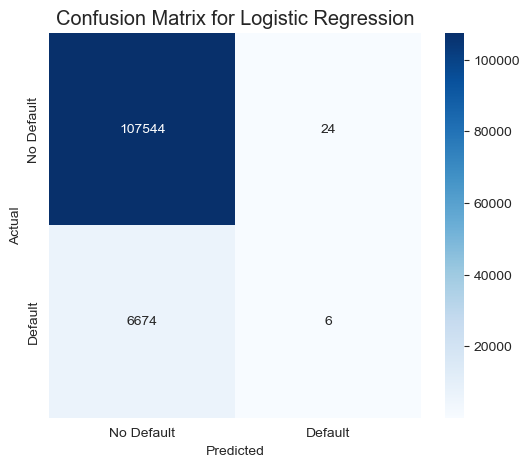

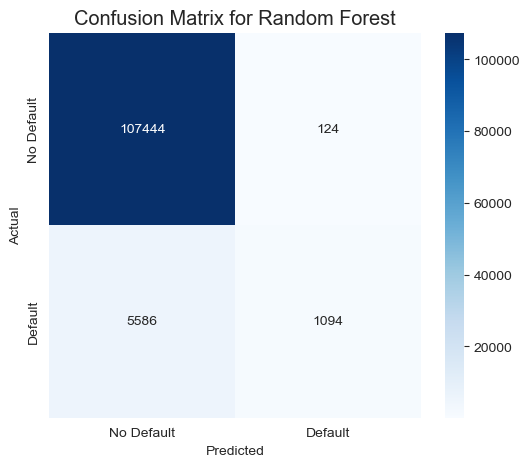

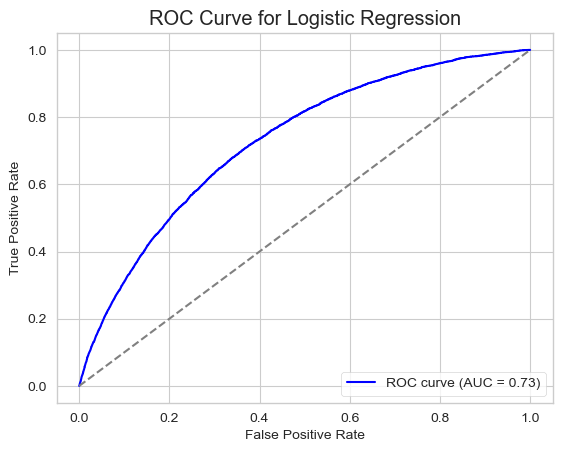

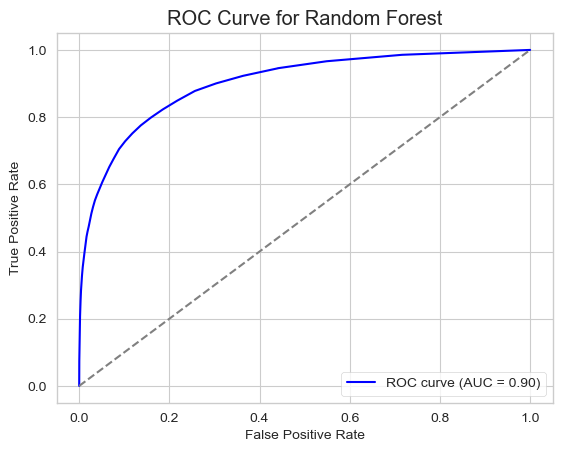

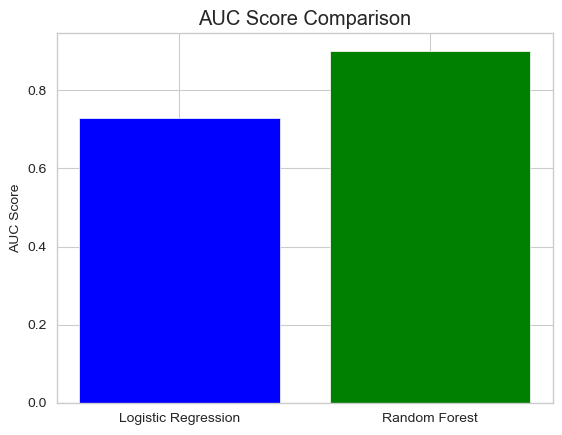

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Plotting Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting ROC Curve
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plot_confusion_matrix(cm_logreg, 'Logistic Regression')

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, 'Random Forest')

# ROC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
plot_roc_curve(fpr_logreg, tpr_logreg, auc_score_logreg, 'Logistic Regression')

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plot_roc_curve(fpr_rf, tpr_rf, auc_score_rf, 'Random Forest')

# Bar plot for AUC Scores
plt.bar(['Logistic Regression', 'Random Forest'], [auc_score_logreg, auc_score_rf], color=['blue', 'green'])
plt.title('AUC Score Comparison')
plt.ylabel('AUC Score')
plt.show()


In [56]:
# Menentukan kategori berdasarkan probabilitas
def categorize_risk(prob):
    if prob < 0.33:
        return 'Low Risk'
    elif prob < 0.66:
        return 'Medium Risk'
    else:
        return 'High Risk'

# Mendapatkan probabilitas dari model (gunakan model yang Anda pilih, misalnya Logistic Regression atau Random Forest)
y_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]  # Logistic Regression
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Random Forest

# Mengonversi probabilitas menjadi kategori
y_pred_logreg_risk = [categorize_risk(prob) for prob in y_prob_logreg]
y_pred_rf_risk = [categorize_risk(prob) for prob in y_prob_rf]

# Menampilkan beberapa hasil
print("Prediksi Kategori Risiko (Logistic Regression):", y_pred_logreg_risk[:10])
print("Prediksi Kategori Risiko (Random Forest):", y_pred_rf_risk[:10])


Prediksi Kategori Risiko (Logistic Regression): ['Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk']
Prediksi Kategori Risiko (Random Forest): ['Low Risk', 'Low Risk', 'High Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk']


In [57]:
# Logistic Regression untuk multi-class classification
logreg_model_multiclass = LogisticRegression(multi_class='ovr', max_iter=1000)
logreg_model_multiclass.fit(X_train_scaled, y_train)

# Prediksi multi-class
y_pred_logreg_multiclass = logreg_model_multiclass.predict(X_test_scaled)

# Evaluasi model
print("Logistic Regression Multi-Class Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_multiclass))

print("\nLogistic Regression Multi-Class Classification Report:")
print(classification_report(y_test, y_pred_logreg_multiclass))


Logistic Regression Multi-Class Confusion Matrix:
[[107544     24]
 [  6674      6]]

Logistic Regression Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    107568
           1       0.20      0.00      0.00      6680

    accuracy                           0.94    114248
   macro avg       0.57      0.50      0.49    114248
weighted avg       0.90      0.94      0.91    114248



In [58]:
# Random Forest untuk multi-class classification
rf_model_multiclass = RandomForestClassifier(random_state=42)
rf_model_multiclass.fit(X_train, y_train)

# Prediksi multi-class
y_pred_rf_multiclass = rf_model_multiclass.predict(X_test)

# Evaluasi model
print("\nRandom Forest Multi-Class Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_multiclass))

print("\nRandom Forest Multi-Class Classification Report:")
print(classification_report(y_test, y_pred_rf_multiclass))



Random Forest Multi-Class Confusion Matrix:
[[107444    124]
 [  5586   1094]]

Random Forest Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    107568
           1       0.90      0.16      0.28      6680

    accuracy                           0.95    114248
   macro avg       0.92      0.58      0.63    114248
weighted avg       0.95      0.95      0.93    114248



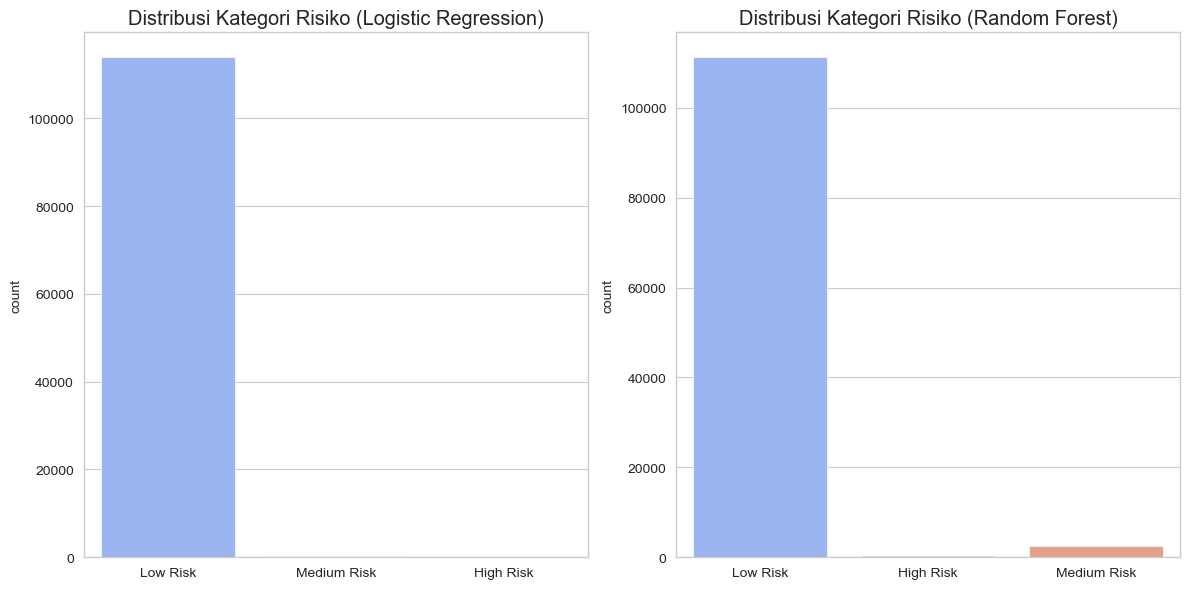

In [59]:
# Visualisasi distribusi kategori risiko untuk kedua model
plt.figure(figsize=(12, 6))

# Logistic Regression
plt.subplot(1, 2, 1)
sns.countplot(x=y_pred_logreg_risk, palette='coolwarm')
plt.title('Distribusi Kategori Risiko (Logistic Regression)')

# Random Forest
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred_rf_risk, palette='coolwarm')
plt.title('Distribusi Kategori Risiko (Random Forest)')

plt.tight_layout()
plt.show()


In [60]:
# Evaluasi Logistic Regression
train_score_logreg = logreg_model.score(X_train_scaled, y_train)
test_score_logreg = logreg_model.score(X_test_scaled, y_test)

print(f"Logistic Regression - Training Accuracy: {train_score_logreg:.2f}")
print(f"Logistic Regression - Testing Accuracy: {test_score_logreg:.2f}")

# Evaluasi Random Forest
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

print(f"Random Forest - Training Accuracy: {train_score_rf:.2f}")
print(f"Random Forest - Testing Accuracy: {test_score_rf:.2f}")


Logistic Regression - Training Accuracy: 0.94
Logistic Regression - Testing Accuracy: 0.94
Random Forest - Training Accuracy: 1.00
Random Forest - Testing Accuracy: 0.95
